In [1]:
%matplotlib inline
from pylab import *
from ipywidgets import interact, widgets
from IPython import display
from keyframes import hello
from keyframes import wipe_forehead
from keyframes import leftBackToStand
from keyframes import leftBellyToStand
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
pi = np.pi
keyframesDict = {"Hello!" : hello(), "Wipe It!" : wipe_forehead(), "Stand Up from Back!" : leftBackToStand(), "Stand Up from Belly!" : leftBellyToStand()}

In [2]:
from forward_kinematics import ForwardKinematicsAgent
from recognize_posture import PostureRecognitionAgent
agent = ForwardKinematicsAgent() #so he wont constantly try to get up when he is down

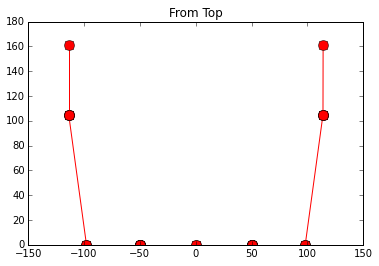

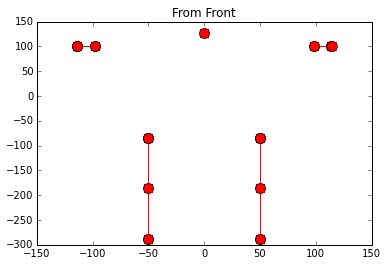

In [3]:
#setup Buttons:
buttons = []
thisTime = 0.
def keyFrameOnClick(ev = None):
    global agent
    agent.set_keyframes(keyframesDict[ev.description])
    display.clear_output(True)
    plt.cla()
    thisTime = agent.perception.time
for label in keyframesDict:
    buttons.append(widgets.Button(description = label))
    buttons[-1].on_click(keyFrameOnClick)
display.display(widgets.HBox(buttons))


#setup interactive rest
joint_name='HeadYaw'
@interact(name=agent.joint_names)
def set_test_joint(name):
    global agent
    global joint_name
    joint_name = name
    agent.testJoint = joint_name
bezier = 0
@interact(setBezier=(0,1))
def set_bezier(setBezier):
    global bezier
    bezier = setBezier
@interact(kp=(0, 100, 1), ki=(-1, 1, 0.1), kd=(-1, 1, 0.1), delay=(0, 5))
def set_pid_parameters(kp, ki, kd, delay=1):
    global agent
    agent.joint_controller.Kp = kp
    agent.joint_controller.Ki = ki
    agent.joint_controller.Kd = kd
    agent.joint_controller.set_delay(delay)
@interact(value=(-pi/2, pi/2, pi/20))
def set_joint_target(value):
    agent.target_joints[joint_name] = value
    cla()
    for chain in agent.chains.values():
        x = deque(maxlen=30)
        y = deque(maxlen=30)
        z = deque(maxlen=30)
        for joint in chain:
            x.append(agent.transforms[joint][0][-1])
            y.append(agent.transforms[joint][1][-1])
            z.append(agent.transforms[joint][2][-1])
            
        for i in range(len(x) - 1):
            plt.figure(1)
            plot([-y[i], -y[i + 1]],[x[i], x[i + 1]], '-or', markersize = 10)
            plt.figure(2)
            plot([-y[i], -y[i + 1]],[z[i], z[i + 1]], '-or', markersize = 10)
    plt.figure(1)
    plt.title("From Top")
    plt.figure(2)
    plt.title("From Front")
    display.clear_output(wait=True)
    plt.show(gcf())

In [4]:
# inject plotting input agent's loop

agent.start()